In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Notebook that handles data loading! 

This notebook is used to initially load and prepare data. This means loading into a datamanager, merging data (if wanted), and doing any preliminary alterations to the dataset. 

In [5]:
from data_prep import data_manager as DM

# instanciate a new datamanager 
dm = DM.Data_Manager()

# loads all data into the datamanager 
dm.data_loader()


## Before doing anything, we fill in missing values by imputing

In [6]:
imputes = dm.impute_data([dm.X_train_observed_a, 
                                   dm.X_train_observed_b, 
                                   dm.X_train_observed_c, 
                                   dm.X_train_estimated_a,
                                   dm.X_train_estimated_b,
                                   dm.X_train_estimated_c,
                                   dm.X_test_estimated_a,
                                   dm.X_test_estimated_b,
                                   dm.X_test_estimated_c])

dm.X_train_observed_a = imputes[0]
dm.X_train_observed_b = imputes[1] 
dm.X_train_observed_c = imputes[2] 
dm.X_train_estimated_a = imputes[3]
dm.X_train_estimated_b = imputes[4]
dm.X_train_estimated_c = imputes[5]
dm.X_test_estimated_a = imputes[6]
dm.X_test_estimated_b = imputes[7]
dm.X_test_estimated_c = imputes[8]

dm.set_info(dm.X_test_estimated_a)

dm.X_train_observed_a = dm.X_train_observed_a.drop("snow_density:kgm3", axis=1)
dm.X_train_observed_b = dm.X_train_observed_b.drop("snow_density:kgm3", axis=1) 
dm.X_train_observed_c = dm.X_train_observed_c.drop("snow_density:kgm3", axis=1) 
dm.X_train_estimated_a = dm.X_train_estimated_a.drop("snow_density:kgm3", axis=1)
dm.X_train_estimated_b = dm.X_train_estimated_b.drop("snow_density:kgm3", axis=1)
dm.X_train_estimated_c = dm.X_train_estimated_c.drop("snow_density:kgm3", axis=1)



 44%|████▍     | 4/9 [00:00<00:00, 15.48it/s]C:\Users\loghe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['snow_density:kgm3']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\loghe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['snow_density:kgm3']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\loghe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['snow_density:kgm3']. At least one

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   absolute_humidity_2m:gm3        2880 non-null   float32       
 1   air_density_2m:kgm3             2880 non-null   float32       
 2   ceiling_height_agl:m            2880 non-null   float32       
 3   clear_sky_energy_1h:J           2880 non-null   float32       
 4   clear_sky_rad:W                 2880 non-null   float32       
 5   cloud_base_agl:m                2880 non-null   float32       
 6   dew_or_rime:idx                 2880 non-null   float32       
 7   dew_point_2m:K                  2880 non-null   float32       
 8   diffuse_rad:W                   2880 non-null   float32       
 9   diffuse_rad_1h:J                2880 non-null   float32       
 10  direct_rad:W                    2880 non-null   float32       
 11  dire

## Now we look at sample rates

the training weather data is sampled every 15 minutes, whilst the pv_measurements are every hour. 
We can either 
1. sample down. Making weather data be every hour using the mean value of every hour 
2. sample up. Making the pv_measurement every 15 min instead of every hour. 

In [7]:
# Sample down

resamples = dm.resample_data([dm.X_train_observed_a, 
                                   dm.X_train_observed_b, 
                                   dm.X_train_observed_c, 
                                   dm.X_train_estimated_a,
                                   dm.X_train_estimated_b,
                                   dm.X_train_estimated_c,
                                   dm.X_test_estimated_a,
                                   dm.X_test_estimated_b,
                                   dm.X_test_estimated_c], "H")

X_train_observed_a_hourly = resamples[0]
X_train_observed_b_hourly = resamples[1] 
X_train_observed_c_hourly = resamples[2] 
X_train_estimated_a_hourly = resamples[3]
X_train_estimated_b_hourly = resamples[4]
X_train_estimated_c_hourly = resamples[5]
X_test_estimated_a_hourly = resamples[6]
X_test_estimated_b_hourly = resamples[7]
X_test_estimated_c_hourly = resamples[8]


# Sample up

resamples = dm.resample_data([
                            dm.X_test_estimated_a,
                            dm.X_test_estimated_b,
                            dm.X_test_estimated_c], "H")


dm.X_test_estimated_a = resamples[0]
dm.X_test_estimated_b = resamples[1]
dm.X_test_estimated_c = resamples[2]

resamples = dm.resample_data([dm.train_a, dm.train_b, dm.train_c], "15T")

train_a_15min = resamples[0]
train_b_15min = resamples[1]
train_c_15min = resamples[2]

dm.train_a = resamples[0]
dm.train_b = resamples[1]
dm.train_c = resamples[2]

train_a_15min



,pv_measurement,date_forecast
0,0.0,2019-06-02 22:00:00
1,NaN,2019-06-02 22:15:00
2,NaN,2019-06-02 22:30:00
3,NaN,2019-06-02 22:45:00
4,0.0,2019-06-02 23:00:00
...,...,...
136512,0.0,2023-04-30 22:00:00
136513,NaN,2023-04-30 22:15:00
136514,NaN,2023-04-30 22:30:00
136515,NaN,2023-04-30 22:45:00


Upsampling introduces alot of nans, which we impute

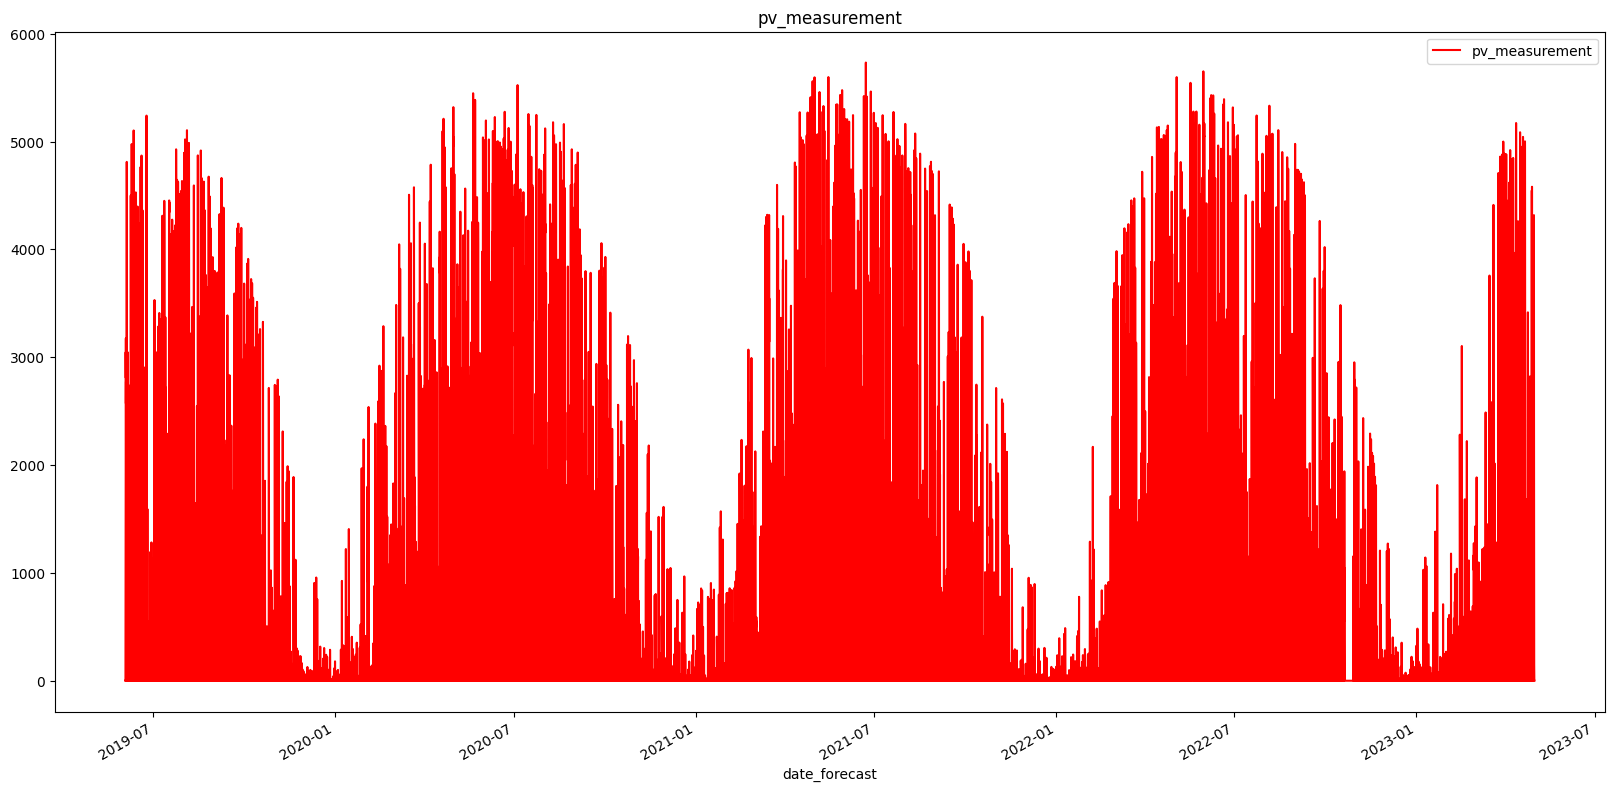

In [8]:
dm.train_a = dm.train_a.interpolate()
dm.train_b = dm.train_b.interpolate()
dm.train_c = dm.train_c.interpolate()

dm.plot_feature(dm.train_a, "pv_measurement")


## Combining data into one training set 

In [9]:
data_A, data_B, data_C = dm.combine_data()

## Combining datasets into one observed set and one estimated set

In [10]:
data_A_obs, data_B_obs, data_C_obs, data_A_es, data_B_es, data_C_es  = dm.combine_data(False)

print(data_A_obs.shape,data_B_obs.shape,data_C_obs.shape, data_A_es.shape,data_B_es.shape,data_C_es.shape)

dm.set_info(data_C_es)

(118669, 46) (116928, 46) (93177, 46) (17573, 46) (14981, 46) (12293, 46)
<class 'pandas.core.frame.DataFrame'>
Index: 12293 entries, 116924 to 129312
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   pv_measurement                  12293 non-null  float64       
 1   date_forecast                   12293 non-null  datetime64[us]
 2   absolute_humidity_2m:gm3        12293 non-null  float32       
 3   air_density_2m:kgm3             12293 non-null  float32       
 4   ceiling_height_agl:m            12293 non-null  float32       
 5   clear_sky_energy_1h:J           12293 non-null  float32       
 6   clear_sky_rad:W                 12293 non-null  float32       
 7   cloud_base_agl:m                12293 non-null  float32       
 8   dew_or_rime:idx                 12293 non-null  float32       
 9   dew_point_2m:K                  12293 non-null  float32       


In [11]:
%store dm

Stored 'dm' (Data_Manager)
